# TPGshipのシミュレーション動画作成プログラム（2/4）

## 動作時のグラフ図作成編

ライブラリ読み込み

In [1]:
import cartopy.crs as ccrs
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scienceplots
import polars as pl
import numpy as np
import math
from numpy import linalg as LA
import cartopy.feature as cfeature
from PIL import Image
import matplotlib.patches as patches
from datetime import datetime, timedelta, timezone
from dateutil import tz


データファイル読み取り

台風＆TPGship経路データ

In [2]:
year = 2023

TPGship_data = pl.read_csv("output_Folder/TPGshipdata/" + str(year) + "_sim_operation_data+wind+sail+elect_trust.csv")

typhoon_data = pl.read_csv("typhoon_data_6hour_intervals_verpl/table" + str(year) + "_6_interval.csv",encoding="shift-jis")

拠点と運搬船

In [3]:
stBASE_data = pl.read_csv("output_Folder/storageBASEdata/" + str(year) + "storageBASE+sail.csv")

TPGshipの動作時のグラフ画像化

100%|██████████| 1461/1461 [1:33:57<00:00,  3.86s/it]


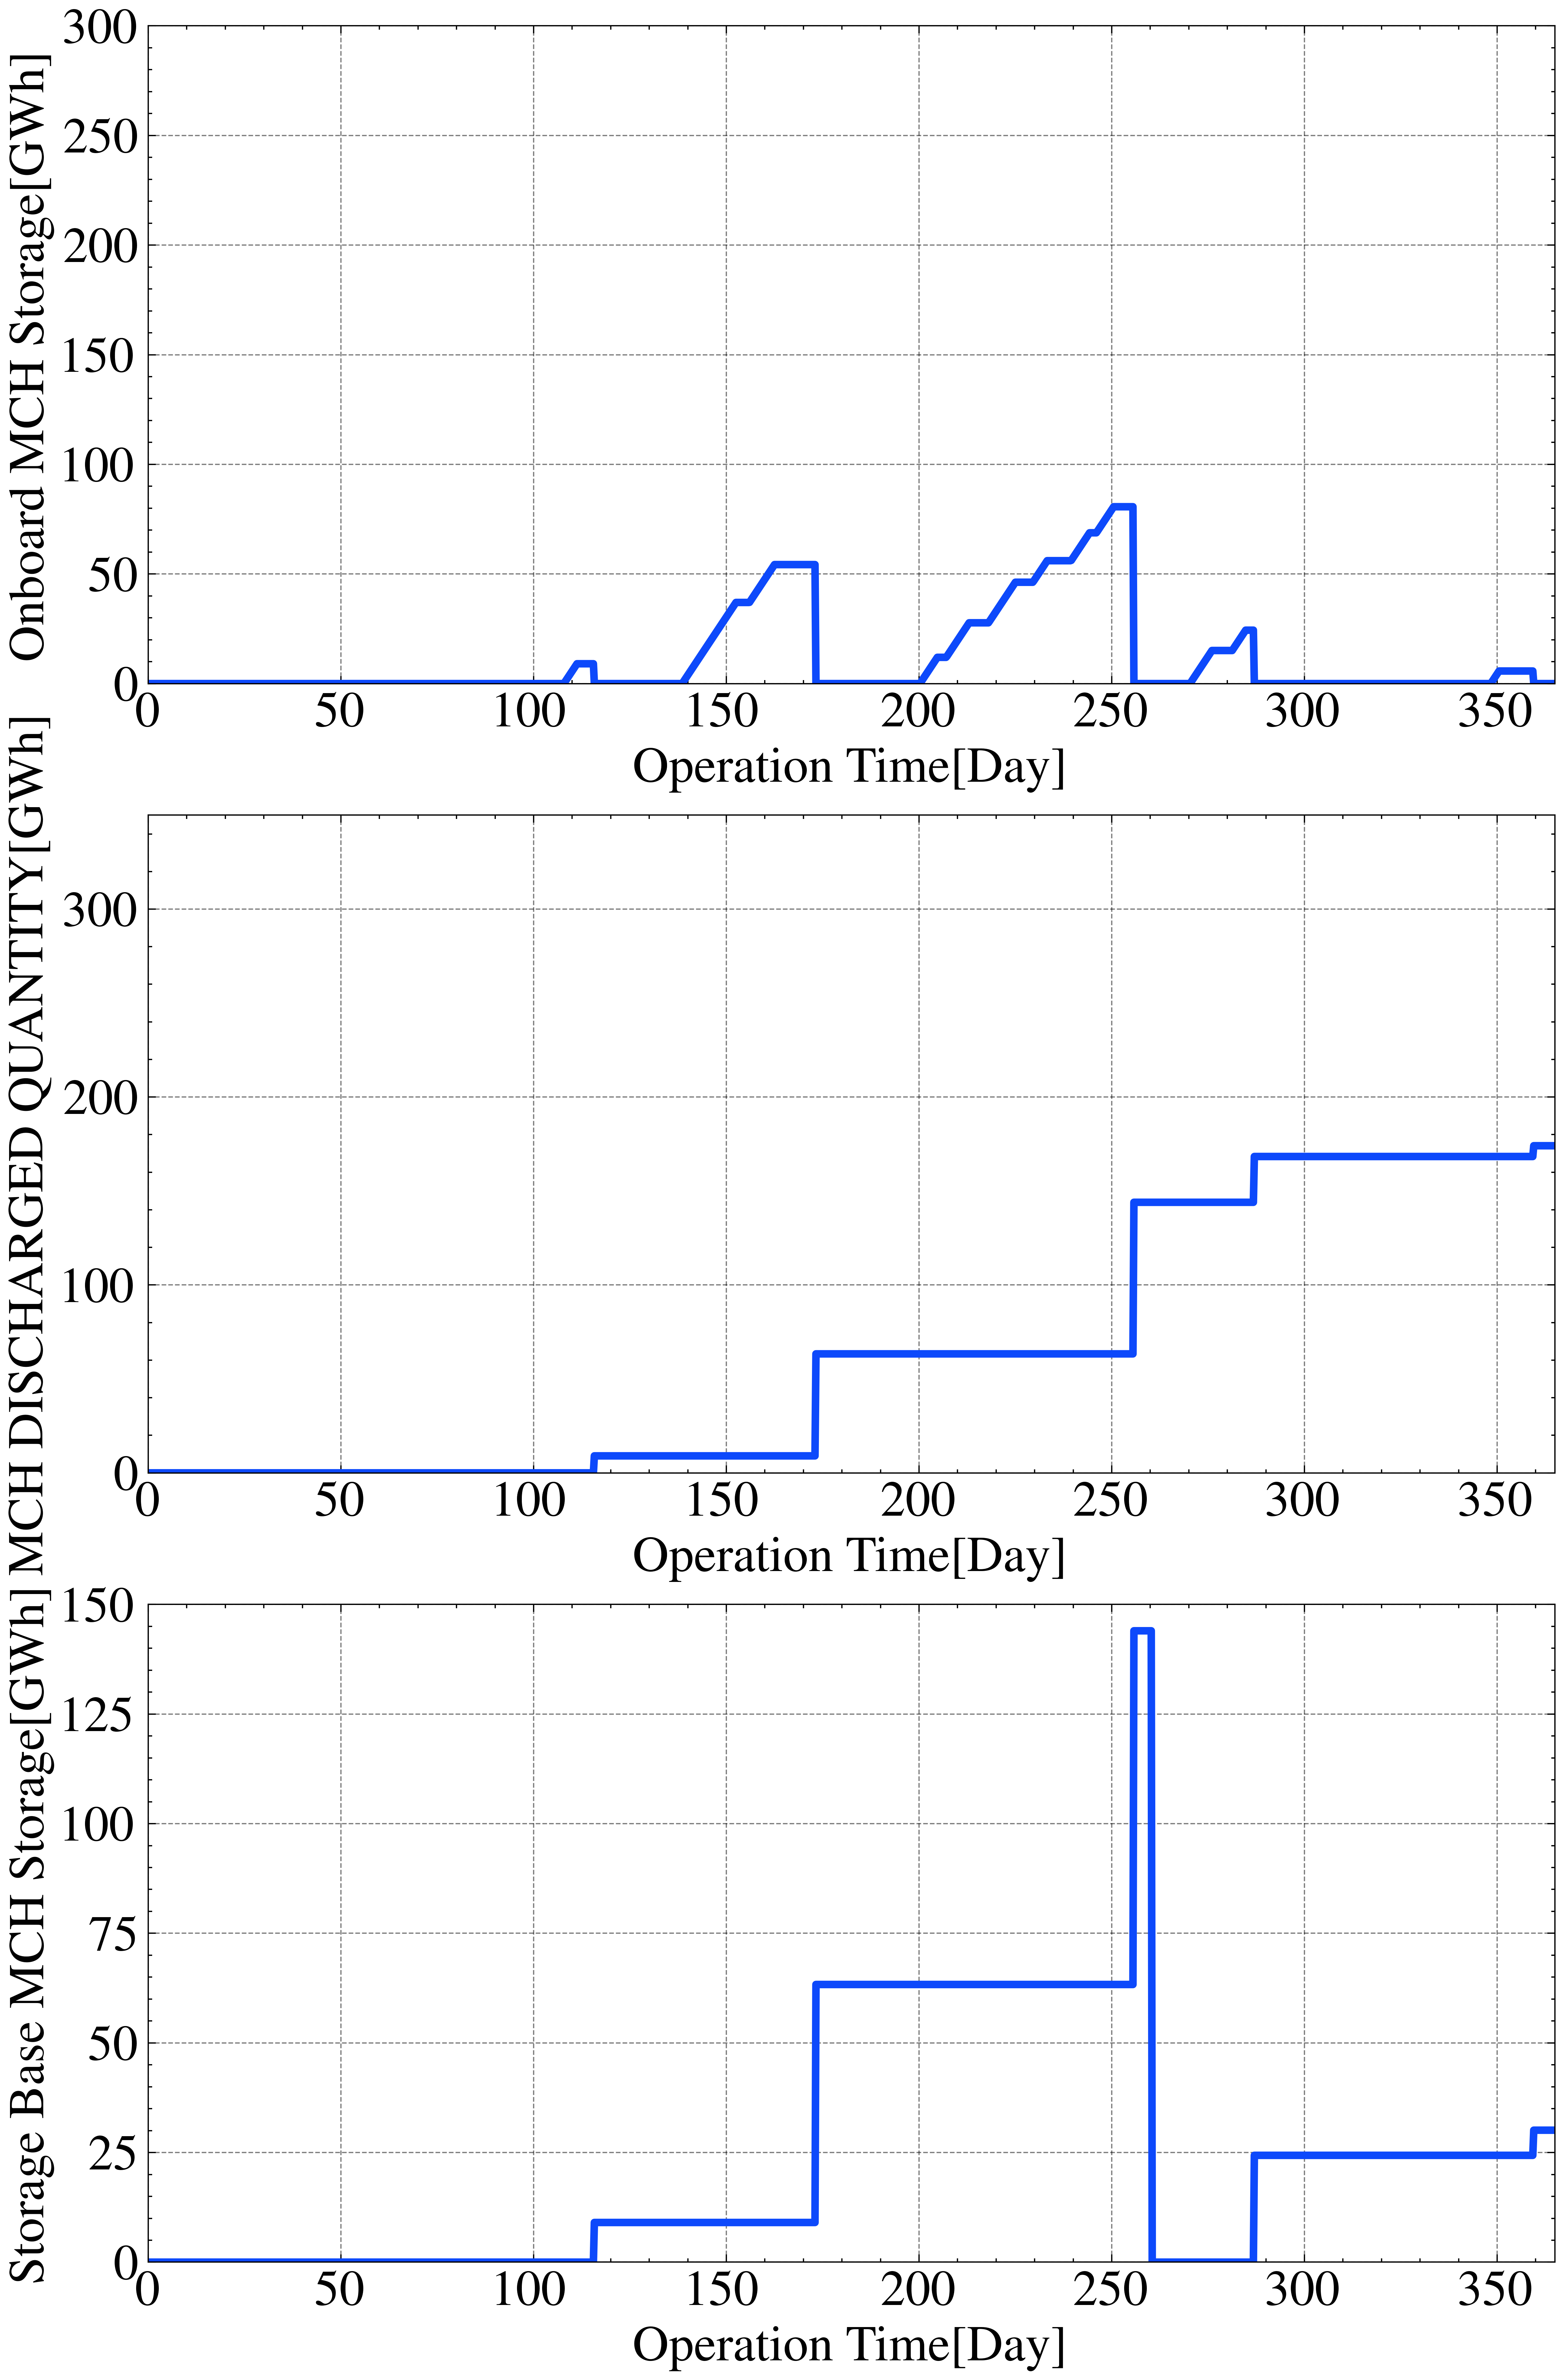

In [4]:
import os
from tqdm import tqdm

UTC = timezone(timedelta(hours =+ 0),"UTC")

# グラフ保存用のフォルダがなければ作成
os.makedirs("png_Folder3", exist_ok=True)

#データの整理
totalgene = stBASE_data["MCH DISCHARGED CARGO QUANTITY[Wh]"]
tg = []
for i in range(len(totalgene)):
    tg.append(totalgene[i]/10**9)

onboardene = TPGship_data["ONBOARD ENERGY STORAGE[Wh]"]
obe = []
for i in range(len(onboardene)):
    obe.append(onboardene[i]/10**9)

basestorage = stBASE_data["STORAGE[Wh]"]
base_data = []
for i in range(len(basestorage)):
    base_data.append(basestorage[i]/10**9)

day = TPGship_data["unixtime"]
daylist = []
for i in range(len(day)):
    daylist.append((day[i]-day[0])/86400)

#グラフの表示
#今回は'science'と'ieee'を利用してみる
plt.style.use(['science','ieee','high-vis','grid'])
plt.rcParams["font.size"] = 20


fig = plt.figure(figsize=(10,16)) # プロット領域の作成（matplotlib）


ax1 =  fig.add_subplot(3,1,1)
ax1_xmin, ax1_xmax = 0, 365
ax1_ymin, ax1_ymax = 0, 300
ax1.set_xlim(xmin=ax1_xmin,xmax=ax1_xmax) #x軸の範囲を指定
ax1.set_ylim(ymin=ax1_ymin,ymax=ax1_ymax) #y軸の範囲を指定
ax1.set(xlabel = 'Operation Time[Day]') #x軸のラベル
ax1.set(ylabel = 'Onboard MCH Storage[GWh]') #y軸のラベル
ax1.plot(daylist,obe,label = 'ONBOARD', linewidth=3)

ax2 =  fig.add_subplot(3,1,2)
ax2_xmin, ax2_xmax = 0, 365
ax2_ymin, ax2_ymax = 0, 350
ax2.set_xlim(xmin=ax2_xmin,xmax=ax2_xmax) #x軸の範囲を指定
ax2.set_ylim(ymin=ax2_ymin,ymax=ax2_ymax) #y軸の範囲を指定
ax2.set(xlabel = 'Operation Time[Day]') #x軸のラベル
ax2.set(ylabel = 'MCH DISCHARGED QUANTITY[GWh]') #y軸のラベル
ax2.plot(daylist,tg,label = 'TOTAL', linewidth=3)

ax3 =  fig.add_subplot(3,1,3)
ax3_xmin, ax3_xmax = 0, 365
ax3_ymin, ax3_ymax = 0, 150
ax3.set_xlim(xmin=ax3_xmin,xmax=ax3_xmax) #x軸の範囲を指定
ax3.set_ylim(ymin=ax3_ymin,ymax=ax3_ymax) #y軸の範囲を指定
ax3.set(xlabel = 'Operation Time[Day]') #x軸のラベル
ax3.set(ylabel = 'Storage Base MCH Storage[GWh]') #y軸のラベル
ax3.plot(daylist,base_data,label = 'BASE OPERATION', linewidth=3)

# for j in range(len(TPGship_data)):
for j in tqdm(range(len(TPGship_data))):
    line1 = ax1.vlines(daylist[j], ax1_ymin, ax1_ymax, color='red')
    line2 = ax2.vlines(daylist[j], ax2_ymin, ax2_ymax, color='red')
    line3 = ax3.vlines(daylist[j], ax3_ymin, ax3_ymax, color='red')
    plt.savefig("png_Folder3/draw" + str(j) + ".png")
    line1.remove()
    line2.remove()
    line3.remove()